![title](header.png)

## Introduction

Seaborn is a module that builds off matplotlib's functionality to let us create great looking graphs easily, usually within one function call. In a data science context, it's used to make very quick and rough judgements by eye, before going on to test them using statistical methods. By the end of this guide you should have a strong grip on how to use seaborn, and be comfortable with representing data of different types using seaborn.

As always, we start by importing our modules for this guide:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline 
#For notebooks, lets us show plots straight away without using plt.show()

Instead of using numbers without context, seaborn comes with some datasets that we can use for practice. Let's load the <i>tips</i> dataset using the <i>load_dataset</i> method:

In [2]:
tips = sns.load_dataset('tips')

In [4]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Great - this dataset is a list of tips and other associated data from a restaurant - let's get started learning how to plot different types of data:

## Categorical Plots

Categorical data, such as days of the week, or sex, can be represented using an number of plots in seaborn. The simplest is the <i>countplot</i> function, which will return a barplot of bars with height corresponding to how often each x value occurs in the dataset. For example, if we want to count how many men and women are in our dataset, we can use:

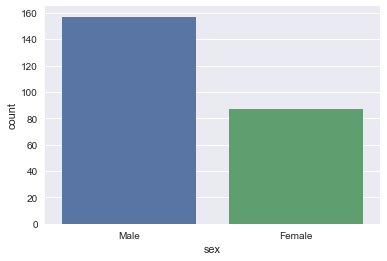

In [5]:
sns.countplot(x='sex',data=tips)

The syntax of the function is different from what we've worked with before with matplotlib, but it's consistent throughout the seaborn library. Each function has numerous optional variables, so we have to explicitly state which is which by saying "x=sex" and "data = tips". Notice how we use the entire dataset of tips as an arguement, then select the column from within the function, rather than indexing the column using pandas first.

If we want to find out the relationship between a categorical variable like sex, and a continuous variable like the total bill, we can use a number of different methods.

The first is the bar plot, which shows one metric very clearly. By default, this metric is set to the mean (or average), but we can change it by passing another arguement. It also gives us a confidence interval for the statistic in question by showing a black line at the top. Let's start by graphing the sex versus the mean total bill:

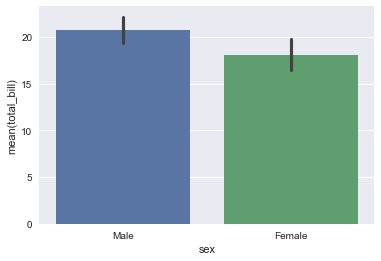

In [6]:
sns.barplot(x='sex',y='total_bill',data=tips)

To change what statistic we use for the height of the bar,s we just pass another arguement - <i>estimator</i>. Here we are using the standard deviation function from numpy to graph how spread out the tips are from the mean.

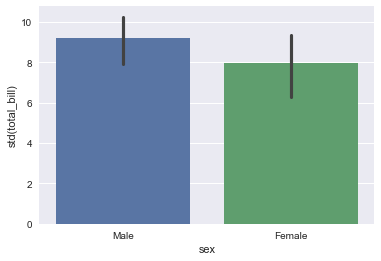

In [7]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

The "estimator" arguement can be any <i>aggregate </i> function, that is, any function that takes a number of arguements and returns one, like the mean or the variance.

To get rid of the error lines on the bar plots, we can pass the argument - <i>ci</i> as False:

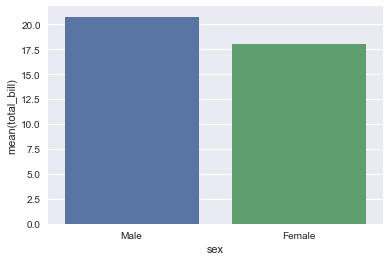

In [6]:
sns.barplot(x='sex',y='total_bill',data=tips, ci=False)

Bar plots are the simplest, and most striking visualisation of data, but leave out some important information. From these two graphs we know that men tip more on average, and have a wider spread, but we can't really draw any more conclusions at a glance. Thankfully, there are some more functions we can run for different graphs that show more information, starting with the <i>boxplot</i> function:

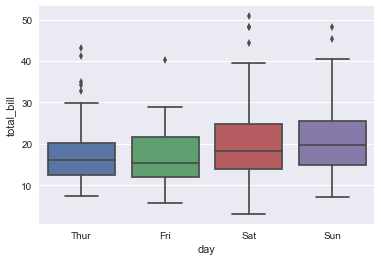

In [8]:
sns.boxplot(x="day", y="total_bill", data=tips)

We can also split this data by gender using the "hue" arguement:

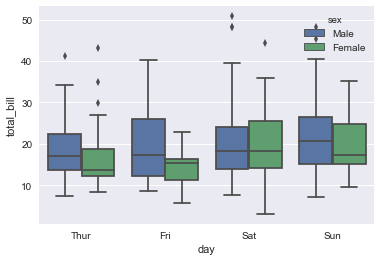

In [9]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex")

This plot shows use even more information - the quartiles as well as any outliers we have, and gives us a good general idea of how our data is distributed. This of course comes at a price of clarity - it takes more time to see the important information. If we want even more detail on the distribution of our data we can use a violin plot, which shows the exact distribution of the dataset in a nice way, along with quartiles, means and interquartile ranges:

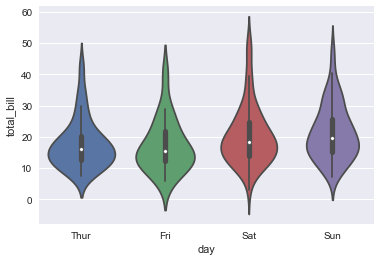

In [10]:
sns.violinplot(x="day", y="total_bill", data=tips)

Similarly to the box plot, we can split this on gender, and for comparison, we can present it neatly as a split violin plot:

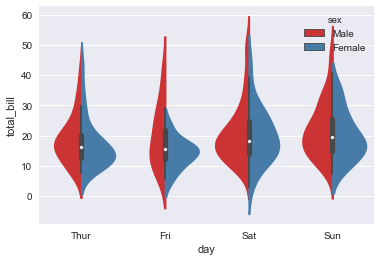

In [11]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

It's up to you to decide what plot is the right plot to use based on context: it's pointless using a violin plot when arguing that one mean is larger than another, and it's pointless using a barplot when discussing the distributions of two variables.

## Distribution Plots

So far we've seen plots using categorical data, but more often than not, both of the variables we want to look at will be continuous - like time, or distance. For this, we are interested in distribution plots. The simplest of these is the <i>distplot</i> function, which gives us a histogram, as well as a kernel density estimation (the blue line) of one continuous variable:

C:\Users\stmba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


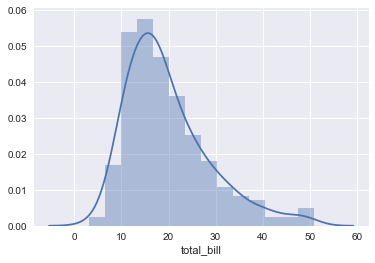

In [13]:
sns.distplot(tips['total_bill']) #You might get an error here, but you can ignore it

A lot of the time we will want to look at the relationship between two sets of continuous data, for example, the total bill and the tips associated with them. Seaborn comes with a neat method of plotting these through the joinplot function - that takes a "kind" arguement for the kind of plot we want. This can be any of the following:
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

Here are graphs of the total bill versus the tip size with a few of these types of points:

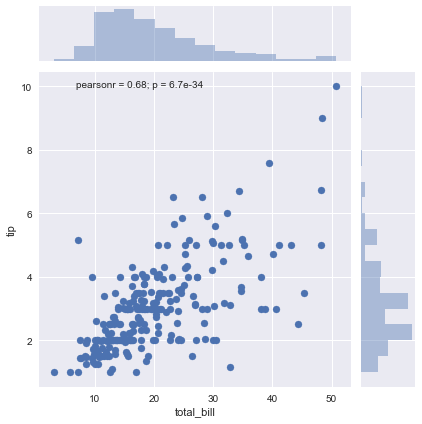

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

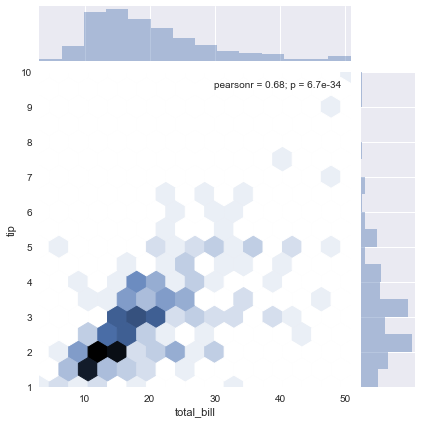

In [18]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

C:\Users\stmba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


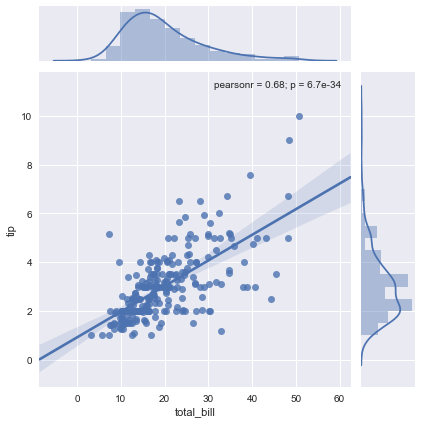

In [19]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

As with the categorical data, you should try and use the plot that is appropriate for the point you are making - if you are trying to show the relationship between two variables, the "reg" type might be the best - but if you are trying to show where clusters of data lie - you might be better off with the "hex" type.

It should be noted if we want to quickly get insight into the relationships between our continuous (and discrete) data, we can use the pairplot function, which plots every column versus every other column in a grid:

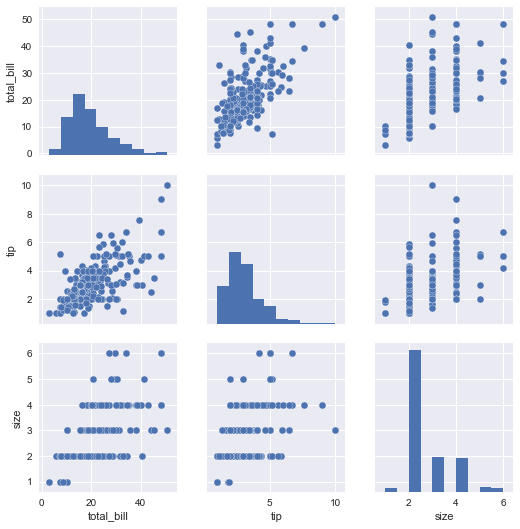

In [16]:
sns.pairplot(data=tips)

## Palettes

Seaborn also comes with a plethora of ways to make our data look nice, the easiest being the "palette" arguement - using this for our boxplots from earlier we get:

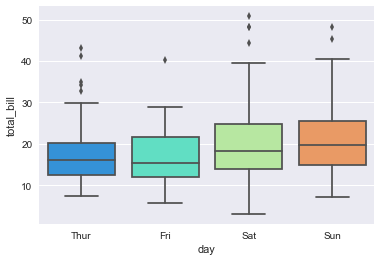

In [17]:
sns.boxplot(x="day", y="total_bill", data=tips, palette="rainbow")

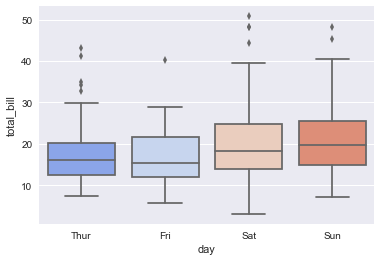

In [18]:
sns.boxplot(x="day", y="total_bill", data=tips, palette="coolwarm")

More information on this can be found in the documentation.

## Worked Example

The "titanic" dataset contains information about the passengers on the titanic, including if they survived 

In [21]:
attn = sns.load_dataset('titanic')

In [22]:
print(attn.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who adult_male deck  embark_town alive  alone  
0    man       True  NaN  Southampton    no  False  
1  woman      False    C    Cherbourg   yes  False  
2  woman      False  NaN  Southampton   yes   True  
3  woman      False    C  Southampton   yes  False  
4    man       True  NaN  Southampton    no   True  


Let's look at the distribution of genders:

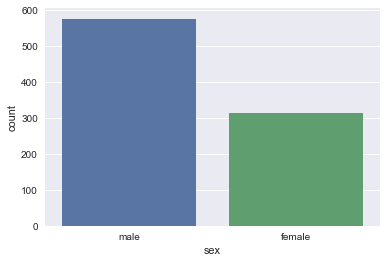

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline 

sns.countplot(x='sex',data=attn)

So about two thirds of passengers were men - what if we break this down by class?

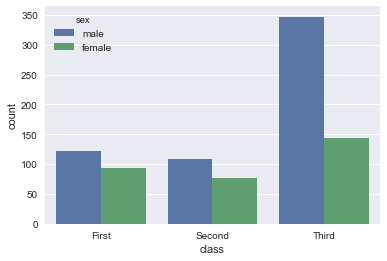

In [22]:
sns.countplot(x='class',data=attn, hue='sex')

We see that this imbalance of gender comes mainly from third class.

What's the age distribution of the different classes, split by genders?

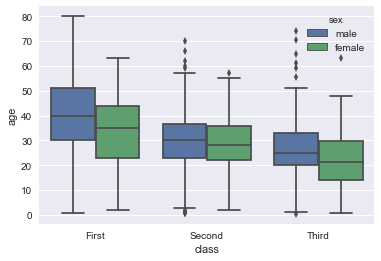

In [23]:
sns.boxplot(x='class',y='age',data=attn, hue='sex')

So it seems that older people are more likely to be in first class - interesting!

What happens if we graph age versus fare?

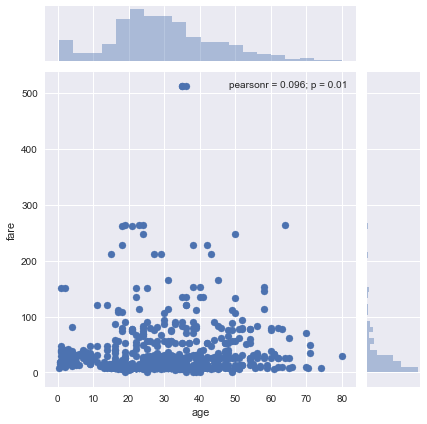

In [25]:
sns.jointplot(x='age',y='fare',data=attn,kind='scatter')

Later we will look at regression in more detail, but "pearsonr" is a measure of how strongly the data is correlated - another way of checking this is with corr(), or correlation method, on the dataframe we want to use. Here we run a list of columns as an index (hence the double square brackets) to avoid getting all the other correlations. 

In [27]:
attn[['age', 'fare']].corr()

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


Looks like there isn't much correlation between the age of a passenger and the fare they paid.

Let's take a look at who survived, starting with a simple count plot:

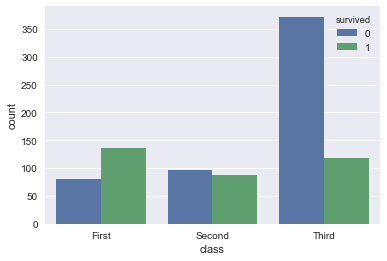

In [26]:
sns.countplot(x='class',data=attn, hue='survived')

So it looks like the majority of deaths came from third class. If we want to split this by gender, it's helpful to create a new dataframe with only those who survived in, and perform a countplot on that:

What's going on here is that attn['survived'] == 1 returns a list of True and False values for each row, and then we only filter by those rows which are true:

In [27]:
attnGender = attn[attn['survived'] == 1]

print(attnGender.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who adult_male deck  embark_town alive  alone  
1  woman      False    C    Cherbourg   yes  False  
2  woman      False  NaN  Southampton   yes   True  
3  woman      False    C  Southampton   yes  False  
8  woman      False  NaN  Southampton   yes  False  
9  child      False  NaN    Cherbourg   yes  False  


Now we can look at the makeup out of those who survived:

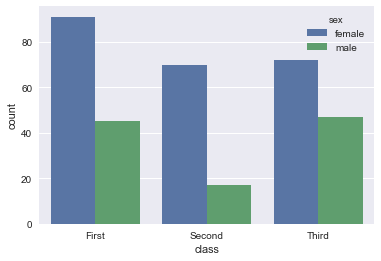

In [58]:
sns.countplot(x='class',data=attnGender, hue='sex')

There's a load of different directions we can go with this - as well as using analytical techniques to improve our process. For now, it's about asking and answering the right questions.

## Mini Project

Load in the titanic dataset, and do the following:

* Create a countplot of the towns the passengers embarked from.
* Using the hue arguement, split this into gender.
* Find the distribution of ages using distplot
* Create a boxplot of age versus the town the passenger embarked from.

## Resources and Further Reading

* Seaborn Documentation https://seaborn.pydata.org/
* Pandas Documentation http://pandas.pydata.org/pandas-docs/stable/
* Matplotlib Documentation https://matplotlib.org/contents.html
* List of datasets that come with Seaborn https://github.com/mwaskom/seaborn-data 